# **Title:**

#        **ITSM Improvement through Machine Learning: Enhancing Incident Managementm at ABC Tech.**

## **PROBLEM** **OF** **STATEMENT:**

*   Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

*   Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

*    Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*    Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

# **Description:**
## **Business Case Description:**

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. **Predicting High Priority Tickets:** ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

2. **Forecasting Incident Volume:** The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

3. **Auto-Tagging Tickets:** ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

4. **Predicting RFC and ITSM Asset Misconfigurations:** The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

Here's a summary of some key fields in the dataset:

- CI_Name: Configuration Item Name
- CI_Cat: Configuration Item Category
- CI_Subcat: Configuration Item Subcategory
- Incident_ID: Incident Identifier
- Status: Incident Status (e.g., Closed)
- Impact: Impact level
- Urgency: Urgency level
- Priority: Incident Priority
- Category: Incident Category
- KB_number: Knowledge Base Number
- Alert_Status: Alert Status
- No_of_Reassignments: Number of Reassignments
- Open_Time: Incident Open Time
- Reopen_Time: Incident Reopen Time
- Resolved_Time: Incident Resolved Time
- Close_Time: Incident Close Time
- Handle_Time_hrs: Time taken to handle the incident (in hours)
- Closure_Code: Code for incident closure
- No_of_Related_Interactions: Number of Related Interactions
- Related_Interaction: Identifier for Related Interaction
- No_of_Related_Incidents: Number of Related Incidents
- No_of_Related_Changes: Number of Related Changes
- Related_Change: Identifier for Related Change


## **Basic Checks**

## **Import Basic Libraries:**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Load Data:**

In [10]:
data=pd.read_csv("Data/ITSM_data.csv")

In [11]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,5/2/2012 13:32,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12/3/2012 15:44,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10/8/2012 11:01,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [12]:
data.shape

(46606, 25)

In [13]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [16]:
data.dtypes

CI_Name                        object
CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
KB_number                      object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
Related_Interaction            object
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                 object
dtype: object

In [17]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Priority,45226.0,4.215805,0.705624,1.000000,4.000000,4.000000,5.000000,5.000000
number_cnt,46606.0,0.499658,0.288634,0.000023,0.248213,0.500269,0.749094,0.999997
No_of_Reassignments,46605.0,1.131831,2.269774,0.000000,0.000000,0.000000,2.000000,46.000000
No_of_Related_Interactions,46492.0,1.149897,2.556338,1.000000,1.000000,1.000000,1.000000,370.000000
No_of_Related_Incidents,1222.0,1.669394,3.339687,1.000000,1.000000,1.000000,1.000000,63.000000
No_of_Related_Changes,560.0,1.058929,0.403596,1.000000,1.000000,1.000000,1.000000,9.000000


In [19]:
data.describe(include="object")

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10/10/2013 12:53,2/10/2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [21]:
data.sample(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
8359,WBA000058,application,Web Based Application,WBS000073,IM0008521,Closed,4,4,4.0,0.338484,incident,KM0001685,closed,0.0,28-10-2013 12:03,NaN,28-10-2013 12:08,28-10-2013 12:08,"0,074166667",Other,1.0,SD0023155,NaN,NaN,NaN
23561,WBA000133,application,Web Based Application,WBS000073,IM0023809,Closed,5,5,5.0,0.581972,incident,KM0001734,closed,0.0,24-12-2013 10:50,NaN,30-12-2013 12:51,30-12-2013 12:51,"4,32,52,77,778",No error - works as designed,1.0,SD0071369,NaN,NaN,NaN
15524,SBA000462,application,Server Based Application,WBS000073,IM0015734,Closed,4,4,4.0,0.703832,incident,KM0001866,closed,0.0,21-11-2013 14:23,25-11-2013 12:51,25-11-2013 15:40,25-11-2013 15:40,"1,13,46,11,111",Software,3.0,#MULTIVALUE,NaN,NaN,NaN
46435,SBA000317,application,Server Based Application,WBS000048,IM0046884,Closed,5,5,5.0,0.723693,incident,KM0000310,closed,0.0,31-03-2014 10:01,NaN,31-03-2014 10:27,31-03-2014 10:28,"0,448611111",Software,2.0,#MULTIVALUE,NaN,NaN,NaN
12625,SBA000834,application,Server Based Application,WBS000223,IM0012812,Closed,4,4,4.0,0.089684,incident,KM0001217,closed,1.0,12/11/2013 9:51,NaN,12/11/2013 10:29,12/11/2013 10:29,"0,640833333",Other,1.0,SD0036166,NaN,NaN,NaN


# **Data Preprocessing**

In [22]:
data.drop(["CI_Name", "WBS", "Incident_ID", "KB_number", "Related_Interaction","Related_Change","Open_Time","Close_Time","Resolved_Time","Handle_Time_hrs"], axis=1, inplace=True)

In [23]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

In [24]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("----------------------------")

CI_Cat ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
----------------------------
CI_Subcat ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Sca

In [25]:
num_data=data.select_dtypes(include=["float64","int64"]).columns
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.

In [26]:
data.drop(["Alert_Status"],axis=1,inplace=True)

## **Replacing Null Values**

### **Replacing Null Values for CI_Cat**

In [27]:
data[data["CI_Cat"].isnull()]["CI_Cat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
1173     NaN
1207     NaN
2609     NaN
3152     NaN
3872     NaN
3898     NaN
4911     NaN
4980     NaN
5640     NaN
5765     NaN
5989     NaN
6091     NaN
6098     NaN
6874     NaN
6941     NaN
7210     NaN
7294     NaN
7297     NaN
7881     NaN
11710    NaN
12041    NaN
12178    NaN
12318    NaN
12504    NaN
12719    NaN
13141    NaN
13162    NaN
13212    NaN
13307    NaN
13311    NaN
13440    NaN
13526    NaN
13851    NaN
15605    NaN
15992    NaN
16073    NaN
16244    NaN
16268    NaN
16276    NaN
16277    NaN
16452    NaN
16493    NaN
17383    NaN
17623    NaN
17753    NaN
17789    NaN
18166    NaN
18366    NaN
18828    NaN
18835    NaN
19094    NaN
19252    NaN
19332    NaN
19387    NaN
19436    NaN
19652    NaN
19757    NaN
20607    NaN
21177    NaN
21351    NaN
21654    NaN
21713    NaN
22161    NaN
22249    NaN
22261    NaN
22462    NaN
22660    NaN
22734    NaN
23286    NaN
23941    NaN
24608    NaN
25280    NaN

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'subapplication'),
  Text(1, 0, 'application'),
  Text(2, 0, 'computer'),
  Text(3, 0, 'displaydevice'),
  Text(4, 0, 'software'),
  Text(5, 0, 'storage'),
  Text(6, 0, 'database'),
  Text(7, 0, 'hardware'),
  Text(8, 0, 'officeelectronics'),
  Text(9, 0, 'networkcomponents'),
  Text(10, 0, 'applicationcomponent'),
  Text(11, 0, 'Phone')])

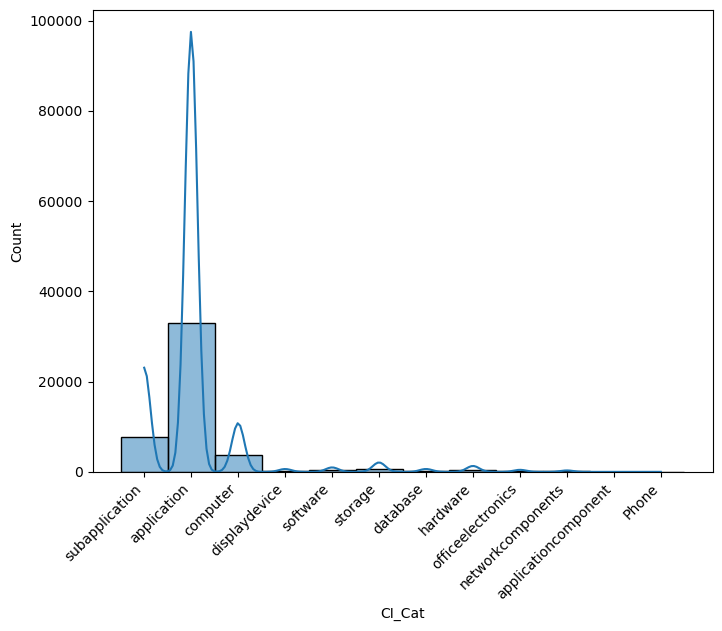

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Cat'], kde=True)
#sns.histplot(data=data, x=data["CI_Cat"],order=data["CI_Cat"].value_counts().index,kde=true)
plt.xticks(rotation=45,ha="right")

* The majority of the data is between 0 and 600.
* There are a few outliers at the high end.
* The median is slightly higher than the mode, which suggests that the data is somewhat skewed to the right.

In [29]:
data["CI_Cat"].mode()

0    application
Name: CI_Cat, dtype: object

In [30]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [31]:
data.loc[data["CI_Cat"].isnull()==True,"CI_Cat"]="application"

In [32]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                       111
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for CI_Subcat**

In [33]:
data[data["CI_Subcat"].isnull()]["CI_Subcat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
1173     NaN
1207     NaN
2609     NaN
3152     NaN
3872     NaN
3898     NaN
4911     NaN
4980     NaN
5640     NaN
5765     NaN
5989     NaN
6091     NaN
6098     NaN
6874     NaN
6941     NaN
7210     NaN
7294     NaN
7297     NaN
7881     NaN
11710    NaN
12041    NaN
12178    NaN
12318    NaN
12504    NaN
12719    NaN
13141    NaN
13162    NaN
13212    NaN
13307    NaN
13311    NaN
13440    NaN
13526    NaN
13851    NaN
15605    NaN
15992    NaN
16073    NaN
16244    NaN
16268    NaN
16276    NaN
16277    NaN
16452    NaN
16493    NaN
17383    NaN
17623    NaN
17753    NaN
17789    NaN
18166    NaN
18366    NaN
18828    NaN
18835    NaN
19094    NaN
19252    NaN
19332    NaN
19387    NaN
19436    NaN
19652    NaN
19757    NaN
20607    NaN
21177    NaN
21351    NaN
21654    NaN
21713    NaN
22161    NaN
22249    NaN
22261    NaN
22462    NaN
22660    NaN
22734    NaN
23286    NaN
23941    NaN
24608    NaN
25280    NaN

<Axes: xlabel='CI_Subcat', ylabel='Count'>

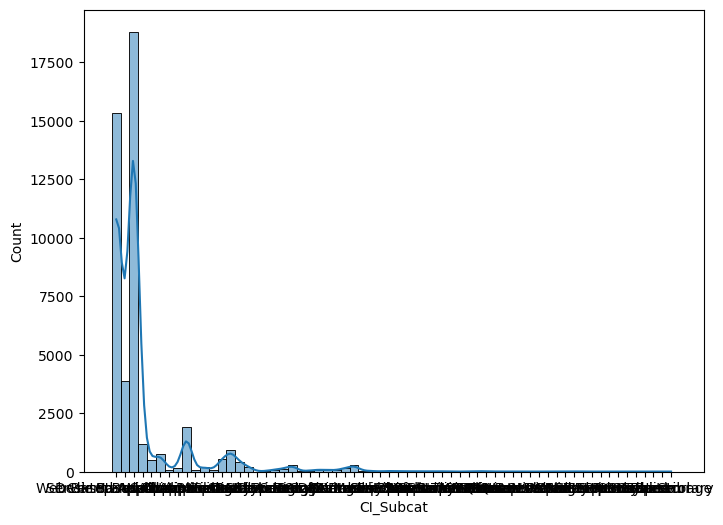

In [34]:


plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Subcat'], kde=True)

* The distribution of the CI_Subcat column is skewed to the right.
* There is a small number of outliers at the high end, representing CI_Subcat values of In Progress and Not Started.

In [35]:
data["CI_Subcat"].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [36]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

CI_Subcat
Server Based Application           18811
Web Based Application              15311
Desktop Application                 3876
Laptop                              1921
SAP                                 1199
Banking Device                       916
Citrix                               767
SAN                                  549
Client Based Application             492
Desktop                              423
DataCenterEquipment                  277
System Software                      272
Monitor                              212
Database                             211
Windows Server                       153
Controller                           146
Exchange                             130
Printer                               88
Omgeving                              86
Standard Application                  85
Scanner                               64
MigratieDummy                         60
Linux Server                          55
Automation Software                   55
Encryp

In [37]:
data.loc[data["CI_Subcat"].isnull()==True,"CI_Subcat"]="Server Based Application"

In [38]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for Priority**

In [40]:
data[data["Priority"].isnull()]["Priority"]

2       NaN
8       NaN
103     NaN
147     NaN
152     NaN
166     NaN
183     NaN
226     NaN
237     NaN
277     NaN
311     NaN
333     NaN
341     NaN
366     NaN
403     NaN
528     NaN
539     NaN
600     NaN
634     NaN
661     NaN
758     NaN
772     NaN
845     NaN
861     NaN
870     NaN
888     NaN
925     NaN
945     NaN
969     NaN
970     NaN
971     NaN
998     NaN
1030    NaN
1056    NaN
1075    NaN
1090    NaN
1159    NaN
1176    NaN
1178    NaN
1184    NaN
1235    NaN
1286    NaN
1303    NaN
1309    NaN
1326    NaN
1329    NaN
1337    NaN
1452    NaN
1547    NaN
1612    NaN
1622    NaN
1644    NaN
1704    NaN
1709    NaN
1816    NaN
1830    NaN
1843    NaN
1875    NaN
1884    NaN
1888    NaN
1917    NaN
1970    NaN
2011    NaN
2027    NaN
2046    NaN
2049    NaN
2125    NaN
2181    NaN
2209    NaN
2210    NaN
2221    NaN
2269    NaN
2292    NaN
2338    NaN
2342    NaN
2344    NaN
2379    NaN
2439    NaN
2457    NaN
2480    NaN
2525    NaN
2554    NaN
2568    NaN
2591

<Axes: xlabel='Priority', ylabel='Count'>

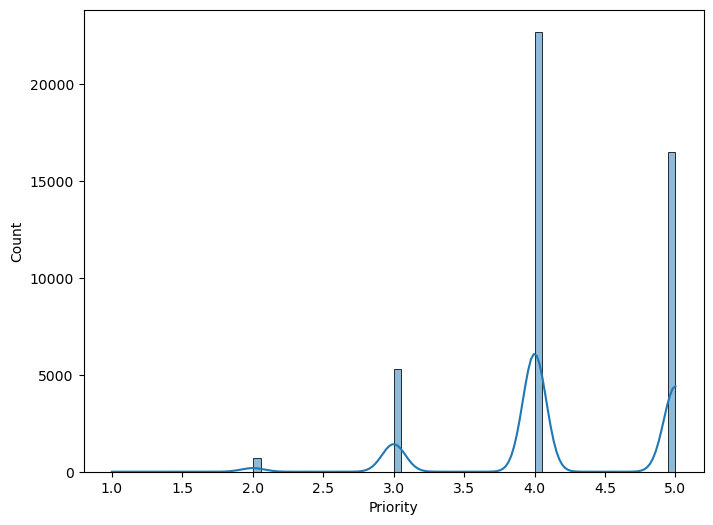

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Priority'], kde=True)

* The distribution of the data is skewed to the right, with most values between 20 and 50.
* There are a few outliers at the high end, with values above 100.

In [42]:
data["Priority"].median()

4.0

In [43]:
data["Priority"].mode()

0    4.0
Name: Priority, dtype: float64

In [44]:
data.loc[data["Priority"].isnull()==True,"Priority"]=4.0

In [45]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [46]:
data.sample(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Reopen_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
22868,application,Server Based Application,Closed,4,4,4.0,0.711910,incident,1.0,24-12-2013 11:19,Other,2.0,NaN,NaN
29870,application,Desktop Application,Closed,3,3,3.0,0.111226,incident,0.0,NaN,Software,1.0,NaN,NaN
2523,application,Server Based Application,Closed,5,5,5.0,0.538660,request for information,2.0,NaN,Software,1.0,NaN,NaN
28214,application,Citrix,Closed,4,4,4.0,0.043777,incident,0.0,NaN,Other,1.0,NaN,NaN
6736,application,Server Based Application,Closed,4,4,4.0,0.686873,incident,0.0,NaN,User error,2.0,NaN,NaN
2080,application,Web Based Application,Closed,5,5,5.0,0.197188,incident,7.0,14-10-2013 14:38,Other,2.0,NaN,NaN
15225,subapplication,Server Based Application,Closed,5,5,5.0,0.316824,request for information,0.0,NaN,User error,1.0,NaN,NaN
1251,application,Web Based Application,Closed,4,4,4.0,0.989715,incident,0.0,NaN,Other,1.0,NaN,NaN
37697,application,Citrix,Closed,4,4,4.0,0.756073,incident,0.0,NaN,Software,1.0,NaN,1.0
31311,application,Desktop Application,Closed,4,4,4.0,0.245752,incident,0.0,NaN,No error - works as designed,1.0,NaN,NaN


### **Remove the row with the null value for No_of_Reassignments**

In [47]:
# Remove the row with the null value in the 'No_of_Reassignments' column
data = data.dropna(subset=['No_of_Reassignments'])

In [48]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Reopen_Time                   44321
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

### **Replacing Null Values for Closure_Code**

In [49]:
data[data["Closure_Code"].isnull()]["Closure_Code"]

9275     NaN
9488     NaN
9698     NaN
9989     NaN
10045    NaN
10071    NaN
10115    NaN
10200    NaN
10333    NaN
10384    NaN
10393    NaN
10522    NaN
10537    NaN
10722    NaN
10726    NaN
10917    NaN
10931    NaN
11142    NaN
11175    NaN
11178    NaN
11337    NaN
11455    NaN
11456    NaN
11535    NaN
11568    NaN
11682    NaN
11752    NaN
11816    NaN
11966    NaN
11976    NaN
12047    NaN
12057    NaN
12075    NaN
12082    NaN
12116    NaN
12319    NaN
12350    NaN
12592    NaN
12703    NaN
13098    NaN
13210    NaN
13216    NaN
13516    NaN
13525    NaN
13563    NaN
13607    NaN
13643    NaN
13649    NaN
13677    NaN
13678    NaN
13691    NaN
13696    NaN
13698    NaN
13789    NaN
13804    NaN
13945    NaN
14019    NaN
14248    NaN
14311    NaN
14332    NaN
14356    NaN
14462    NaN
14550    NaN
14558    NaN
14667    NaN
14711    NaN
14741    NaN
14818    NaN
14843    NaN
14860    NaN
14901    NaN
14939    NaN
14940    NaN
14945    NaN
15144    NaN
15328    NaN
15352    NaN

<Axes: xlabel='Closure_Code', ylabel='Count'>

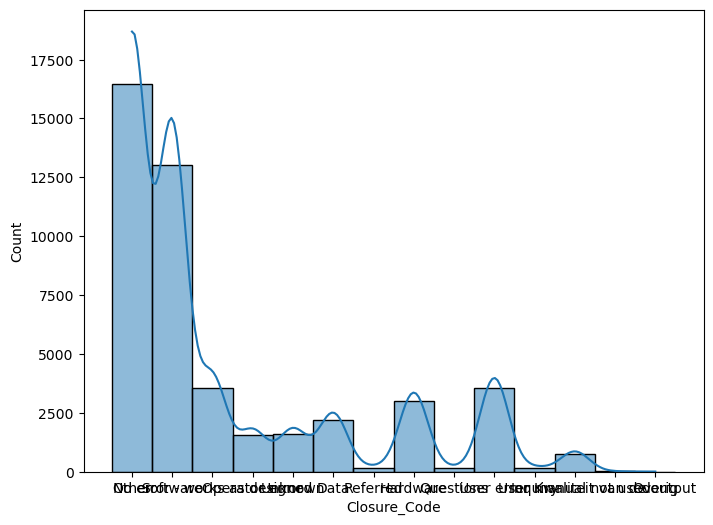

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Closure_Code'], kde=True)

In [51]:
data["Closure_Code"].mode()

0    Other
Name: Closure_Code, dtype: object

In [52]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [53]:
data.loc[data["Closure_Code"].isnull()==True,"Closure_Code"]="other"

In [54]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Reopen_Time                   44321
Closure_Code                      0
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

## **Replacing Null Values for No_of_Related_Interactions**

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  object 
 1   CI_Subcat                   46605 non-null  object 
 2   Status                      46605 non-null  object 
 3   Impact                      46605 non-null  object 
 4   Urgency                     46605 non-null  object 
 5   Priority                    46605 non-null  float64
 6   number_cnt                  46605 non-null  float64
 7   Category                    46605 non-null  object 
 8   No_of_Reassignments         46605 non-null  float64
 9   Reopen_Time                 2284 non-null   object 
 10  Closure_Code                46605 non-null  object 
 11  No_of_Related_Interactions  46491 non-null  float64
 12  No_of_Related_Incidents     1222 non-null   float64
 13  No_of_Related_Changes       560 non-

In [56]:
data.No_of_Related_Interactions.isnull().sum()

114

In [57]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

No_of_Related_Interactions
1.0      43057
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: count, dtype: int64

In [58]:
#data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]#data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

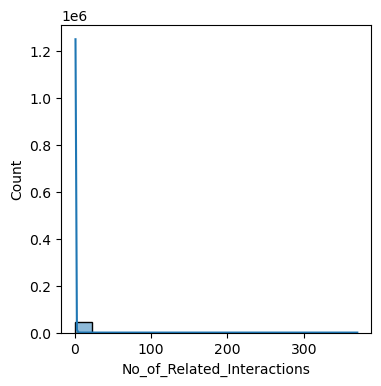

In [59]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x=data['No_of_Related_Interactions'], kde=True)

In [60]:
data["No_of_Related_Interactions"].median()

1.0

In [61]:
data["No_of_Related_Interactions"].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [62]:
data.loc[data["No_of_Related_Interactions"].isnull()==True,"No_of_Related_Interactions"]=1.0

In [63]:
data.No_of_Related_Interactions.isnull().sum()

0

## Check the Missing Values in percentage

In [64]:
data.isnull().sum()/len(data)*100

CI_Cat                         0.000000
CI_Subcat                      0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       0.000000
number_cnt                     0.000000
Category                       0.000000
No_of_Reassignments            0.000000
Reopen_Time                   95.099238
Closure_Code                   0.000000
No_of_Related_Interactions     0.000000
No_of_Related_Incidents       97.377964
No_of_Related_Changes         98.798412
dtype: float64

Here, The Data shows Reopen Time,No of Related Interactions and No of Related Changes are above 95% of missing values. so we drop these columns.

In [66]:
data.drop("No_of_Related_Changes",axis=1,inplace=True)

In [67]:
data.drop("No_of_Related_Incidents",axis=1,inplace=True)

In [68]:
data.drop("Reopen_Time",axis=1,inplace=True)

In [69]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions'],
      dtype='object')